In [38]:
using Random, JuMP, Gurobi, Distances, Plots

In [39]:
n = 10 # number of locations
Random.seed!(1234)
x_pos = rand(0:10, n)
y_pos = rand(0:10, n);

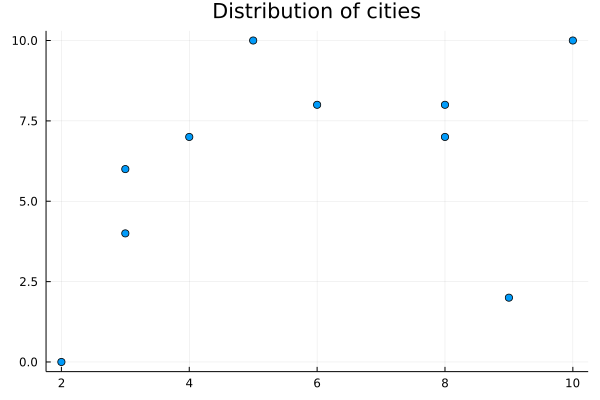

In [40]:
scatter(x_pos, y_pos, title = "Distribution of cities", legend = false)

In [41]:
distance = Dict((i,j) => euclidean((x_pos[i], y_pos[i]), (x_pos[j], y_pos[j])) for i = 1:n, j = 1:n);

In [42]:
# Sets 
locations = 1:n
steps = 1:n

1:10

In [64]:
edges = [(i,j, k) for i in locations for j in locations for k in steps if i != j];

900-element Vector{Tuple{Int64, Int64, Int64}}:
 (1, 2, 1)
 (1, 2, 2)
 (1, 2, 3)
 (1, 2, 4)
 (1, 2, 5)
 (1, 2, 6)
 (1, 2, 7)
 (1, 2, 8)
 (1, 2, 9)
 (1, 2, 10)
 ⋮
 (10, 9, 2)
 (10, 9, 3)
 (10, 9, 4)
 (10, 9, 5)
 (10, 9, 6)
 (10, 9, 7)
 (10, 9, 8)
 (10, 9, 9)
 (10, 9, 10)

In [84]:
# Model 
mdl = Model(Gurobi.Optimizer)

# Decision variables
@variable(mdl, x[edges], Bin);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-10


In [85]:
# Objective function

@objective(mdl, Min, sum(distance[i,j] * x[(i, j, k)] for i in locations, j in locations, k in steps if i != j));

In [86]:
@constraint(mdl, [j in locations, k in 1:n-1], sum(x[(i,j,k)] for i in locations if i !=j) - sum(x[(j,l,k+1)] for l in locations if l != j) == 0);


In [87]:
@constraint(mdl, [j in locations], sum(x[(i,j,n)] for i in locations if i != j) - sum(x[(j,l,1)] for l in locations if l != j) == 0);

In [88]:
@constraint(mdl, [i in locations], sum(x[(i,j,k)] for j in locations, k in steps if j != i) == 1);

In [89]:
JuMP.optimize!(mdl)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 110 rows, 900 columns and 2700 nonzeros
Model fingerprint: 0xf9f82694
Variable types: 0 continuous, 900 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 110 rows, 900 columns, 2700 nonzeros
Variable types: 0 continuous, 900 integer (900 binary)

Root relaxation: objective 3.140167e+01, 233 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   31.40167    0   50          -   31.40167      -     -    0s
H    0     0                      49.8221840   31.40167  37.0%     -    0s
H    0     0                      36.3401173   

In [90]:
x_sol = JuMP.value.(x)
x_opt = [e for e in edges if JuMP.value.(x)[(e)] >= 0.9];

In [98]:
x_opt[1][1:2]

(1, 5)

In [ ]:
sc1 = scatter(x_pos, y_pos, legend = false)
plot!([[x_pos[x_opt[i][1]], x_pos[x_opt[i][2]]] for i in 1:length(x_opt)], 
[[y_pos[x_opt[i][1]], y_pos[x_opt[i][2]]] for i in 1:length(x_opt)], color="red")